##### <a class="anchor" id="Up"> </a>  

## Histograms, Correlations and Scatterplots

1. [Quick recap](#1)
2. [Heatmaps](#2)
3. [Melt](#3)
4. [One-hot encoding](#4)
5. [Bonus for your project: Introduction to custom Word Cloud ☁️](#5)
6. [Tirgul_3 : Pivot_Table](6#)

<a class="anchor" id='1'></a>

<h1 style="background-color: #fff4d9; color: #0046d6; border-radius: 20px; text-align: center; padding-top: 20px; padding-bottom: 20px; font-family: 'Arial'" id="introduction">Quick recap.</h1>

---
> A summary of new functions:
>
>* `drop()` - remove labels or columns [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html?highlight=drop#pandas.DataFrame.drop)
>
>* `str.replace('x','y')` - replace string x with string y
>
>* `reset_index(drop=true)` - resets the index. As defult, the old index is added as a column. Use drop=True to avoid this. [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html)
>
>* `plt.subplots_adjust` - a matplotlib function. adjusts space between the plots. [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots_adjust.html)
>
>* `sum(axis=1)` - sums the values according to the rows, instead of the default sum by columns
>
>* create a list using [list comprehension](https://docs.python.org/3.4/tutorial/datastructures.html#list-comprehensions) - "do something for data in dataframe if condition holds"
>
>* `catplot()` - plot categorical variables onto a grid. [documentation](https://seaborn.pydata.org/generated/seaborn.catplot.html)
>
>* `countplot()` - counts observations for each category (this is like a histogram, but for categorical data)
>
>* `pd.get_dummies()` - creates one-hot encodings for categorical variables. [documentation](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)
>
>* `unstack()` - change the hiearachy of data. [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html)
>
>* `pivot()` - create a pivot table to group and summarize data. [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html)
---

### [▲](#Up)
---

<a class="anchor" id='2'></a>

<h1 style="background-color: #fff4d9; color: #0046d6; border-radius: 20px; text-align: center; padding-top: 20px; padding-bottom: 20px; font-family: 'Arial'" id="introduction">Heatmaps.</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# plt.colormaps()

In [3]:
diamonds = sns.load_dataset('diamonds')

In [4]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### We will write the names of the columns to make it clearer

In [5]:
diamonds.rename(columns={"x": "length", "y": "width", "z" : "depth","depth" : "depth %", "table": "table %"},inplace = True)
diamonds.head(1)

,carat,cut,color,clarity,depth %,table %,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


#### Create another column called L/W ratio by dividing the length by width and see how it correlates with our other features later.

In [7]:
diamonds['L/W'] = diamonds['length']/diamonds['width']

In [8]:
print(diamonds.head())

   carat      cut color clarity  depth %  table %  price  length  width  \
0   0.23    Ideal     E     SI2     61.5     55.0    326    3.95   3.98   
1   0.21  Premium     E     SI1     59.8     61.0    326    3.89   3.84   
2   0.23     Good     E     VS1     56.9     65.0    327    4.05   4.07   
3   0.29  Premium     I     VS2     62.4     58.0    334    4.20   4.23   
4   0.31     Good     J     SI2     63.3     58.0    335    4.34   4.35   

   depth       L/W  
0   2.43  0.992462  
1   2.31  1.013021  
2   2.31  0.995086  
3   2.63  0.992908  
4   2.75  0.997701  


#### We will explain the following lines in more depth in the prediction chapter.

In [9]:
diamonds[['length','width','depth','L/W']]=diamonds[['length','width','depth','L/W']].replace(0,np.NaN)

diamonds.dropna(inplace=True)

In [10]:
diamonds.loc[(diamonds['length'] == 0) | (diamonds['width'] == 0) | (diamonds['depth'] == 0) | (diamonds['L/W'] == 0) ]

,carat,cut,color,clarity,depth %,table %,price,length,width,depth,L/W


In [6]:

# Find the pearson correlations matrix
corr = diamonds.corr(method = 'pearson').round(3)
corr

,carat,depth %,table %,price,length,width,depth
carat,1.000,0.028,0.182,0.922,0.975,0.952,0.953
depth %,0.028,1.000,-0.296,-0.011,-0.025,-0.029,0.095
table %,0.182,-0.296,1.000,0.127,0.195,0.184,0.151
price,0.922,-0.011,0.127,1.000,0.884,0.865,0.861
length,0.975,-0.025,0.195,0.884,1.000,0.975,0.971
width,0.952,-0.029,0.184,0.865,0.975,1.000,0.952
depth,0.953,0.095,0.151,0.861,0.971,0.952,1.000


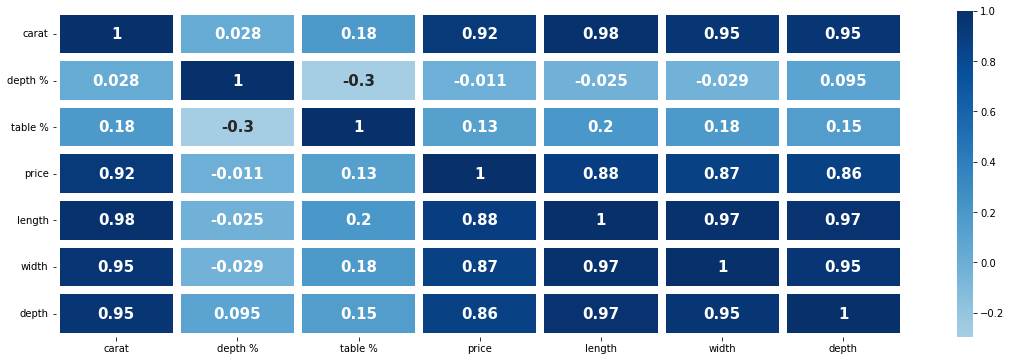

In [12]:
f, ax = plt.subplots(figsize=(19, 6))
sns.heatmap(diamonds.corr(), annot=True, linewidths=8,cmap='Blues',
            annot_kws = {
                   'fontsize' : 15,
                   'fontweight' : 'bold'
                       },center=0,ax=ax)
plt.yticks(rotation = 0);

From the above plot, We can see that carat, length, width, depth, and price are having a high correlation with each other.

However, the categorical data is not taken into account. Since these categories are considered as essential factors for pricing the diamond, therefore, we will compare each category feature with the price.

## Try it yourself at home! Suggest a way to solve this

---

### Correlate on house_df
#### Class discussion: What can be said about this correlation?

In [ ]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/housing.csv'
house_df = pd.read_csv(url)

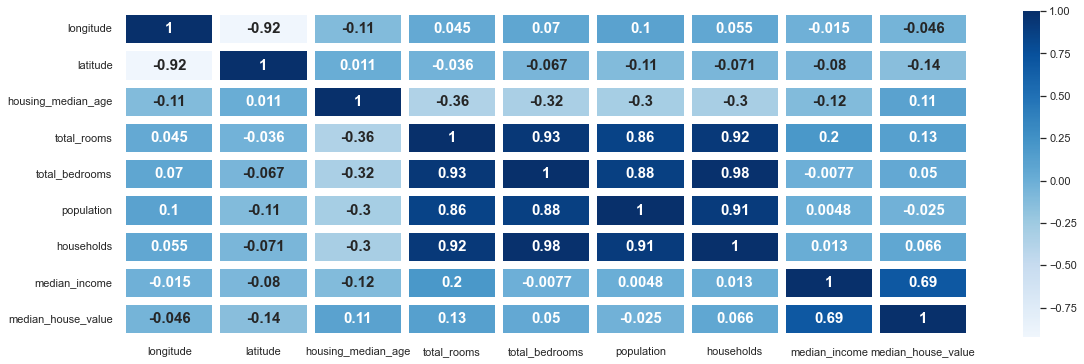

In [142]:
f, ax = plt.subplots(figsize=(19, 6))
sns.heatmap(house_df.corr(), annot=True, linewidths=8,cmap='Blues',
            annot_kws = {
                   'fontsize' : 15,
                   'fontweight' : 'bold'
                       },center=0,ax=ax)
plt.yticks(rotation = 0);

### [▲](#Up)
---

<a class="anchor" id='3'></a>

<h1 style="background-color: #fff4d9; color: #0046d6; border-radius: 20px; text-align: center; padding-top: 20px; padding-bottom: 20px; font-family: 'Arial'" >.Melt()</h1>

### [`.Melt()` documentation](https://pandas.pydata.org/docs/reference/api/pandas.melt.html)

> __id_vars :__   __(scalar, tuple, list, or ndarray, optional)__
>
>  Column(s) to use as identifier variables.

> __value_vars :__ __(scalar, default None)__
>
> Name to use for the ‘variable’ column. If None it uses frame.columns.name or ‘variable’.

> __value_name :__ __(
scalar, default ‘value)__
>
> Name to use for the ‘value’ column, can’t be an existing column label.

> __ignore_index :__ __(bool, default True)__
>
> If True, original index is ignored. If False, the original index is retained. Index labels will be repeated as necessary.

y.l’


In [13]:
data = {'Date': ['2023-01-01', '2023-01-02'],
        'Product A Sales': [100, 120],
        'Product B Sales': [80, 90],
        'Product C Sales': [50, 60]}

sales_df = pd.DataFrame(data)


### Now, if you want to analyze this data more effectively, you may want to reshape it into a long format where each row represents a single sale with columns 'Date', 'Product', and 'Sales'. You can achieve this using the `melt()` function.

In [14]:
# Reshaping the data using melt
melted_df = sales_df.melt(id_vars=['Date'], var_name='Product', value_name='Sales')

### Now, you have the data in a format that makes it easier to perform various __analyses and visualizations__, such as __calculating total sales__ for each product or __plotting trends__ over time.

---
### Question for Practice:

1. Given a DataFrame containing student exam scores with columns 'Student ID', 'Math Score', 'Science Score', and 'English Score', use the `melt()` function to reshape the data into a long format with columns 'Student ID', 'Subject', and 'Score'. This format will make it easier to compare scores across subjects for each student. Provide the code to achieve this transformation.

In [147]:
# Sample DataFrame with exam scores
data = {'Student ID': [1, 2, 3],
        'Math Score': [85, 78, 92],
        'Science Score': [92, 88, 75],
        'English Score': [78, 90, 85]}

exam_scores_df = pd.DataFrame(data)

In [148]:
# Reshape the data using melt
melted_scores_df = exam_scores_df.melt(id_vars=['Student ID'], var_name='Subject', value_name='Score')

# Display the reshaped DataFrame
print(melted_scores_df)

   Student ID        Subject  Score
0           1     Math Score     85
1           2     Math Score     78
2           3     Math Score     92
3           1  Science Score     92
4           2  Science Score     88
5           3  Science Score     75
6           1  English Score     78
7           2  English Score     90
8           3  English Score     85


2. You have a dataset containing monthly weather data for different cities, with columns 'City', 'Jan Temp', 'Feb Temp', ..., 'Dec Temp'. Use the `melt()` function to reshape the data into a long format with columns 'City', 'Month', and 'Temperature'. Provide the code to perform this transformation."

In [20]:
# Set a random seed for reproducibility
np.random.seed(42)

# City temperature data for all months
data = {'City': ['City A', 'City B', 'City C'],
        'Jan Temp': np.random.randint(10, 25, size=3),
        'Feb Temp': np.random.randint(10, 25, size=3),
        'Mar Temp': np.random.randint(10, 25, size=3),
        'Apr Temp': np.random.randint(10, 25, size=3),
        'May Temp': np.random.randint(10, 25, size=3),
        'Jun Temp': np.random.randint(10, 25, size=3),
        'Jul Temp': np.random.randint(10, 25, size=3),
        'Aug Temp': np.random.randint(10, 25, size=3),
        'Sep Temp': np.random.randint(10, 25, size=3),
        'Oct Temp': np.random.randint(10, 25, size=3),
        'Nov Temp': np.random.randint(10, 25, size=3),
        'Dec Temp': np.random.randint(10, 25, size=3)}

# Creating a DataFrame
weather_df = pd.DataFrame(data)

# Displaying the DataFrame
weather_df

,City,Jan Temp,Feb Temp,Mar Temp,Apr Temp,May Temp,Jun Temp,Jul Temp,Aug Temp,Sep Temp,Oct Temp,Nov Temp,Dec Temp
0,City A,16,24,22,19,20,14,17,14,21,11,10,15
1,City B,13,20,14,12,20,13,12,11,23,21,21,22
2,City C,22,17,16,16,17,17,15,17,15,14,19,21


In [25]:
# Reshape the data using melt
melted_weather_df = weather_df.melt(id_vars=['City'], var_name='Month', value_name='Temperature')

# Display the reshaped DataFrame
print(melted_weather_df)

      City     Month  Temperature
0   City A  Jan Temp           16
1   City B  Jan Temp           13
2   City C  Jan Temp           22
3   City A  Feb Temp           24
4   City B  Feb Temp           20
5   City C  Feb Temp           17
6   City A  Mar Temp           22
7   City B  Mar Temp           14
8   City C  Mar Temp           16
9   City A  Apr Temp           19
10  City B  Apr Temp           12
11  City C  Apr Temp           16
12  City A  May Temp           20
13  City B  May Temp           20
14  City C  May Temp           17
15  City A  Jun Temp           14
16  City B  Jun Temp           13
17  City C  Jun Temp           17
18  City A  Jul Temp           17
19  City B  Jul Temp           12
20  City C  Jul Temp           15
21  City A  Aug Temp           14
22  City B  Aug Temp           11
23  City C  Aug Temp           17
24  City A  Sep Temp           21
25  City B  Sep Temp           23
26  City C  Sep Temp           15
27  City A  Oct Temp           11
28  City B  Oc

3. Given a DataFrame representing customer orders with columns 'Order ID', 'Customer Name', 'Product 1', 'Product 2', ..., 'Product N', where 'Product 1', 'Product 2', etc., represent different products in an order, use the `melt()` function to reshape the data into a long format with columns 'Order ID', 'Customer Name', 'Product Name', and 'Quantity'. This format will make it easier to analyze individual product quantities in each order. Provide the code to achieve this transformation."

In [153]:
# Sample DataFrame with customer orders
data = {'Order ID': [1, 2, 3],
        'Customer Name': ['Alice', 'Bob', 'Charlie'],
        'Product 1': ['Item A', 'Item B', 'Item C'],
        'Product 2': ['Item D', 'Item E', 'Item F'],
        # ... Continue with product columns
        }

orders_df = pd.DataFrame(data)

In [154]:
# Reshape the data using melt
melted_orders_df = orders_df.melt(id_vars=['Order ID', 'Customer Name'], var_name='Product Number', value_name='Product Name')

# Display the reshaped DataFrame
print(melted_orders_df)

   Order ID Customer Name Product Number Product Name
0         1         Alice      Product 1       Item A
1         2           Bob      Product 1       Item B
2         3       Charlie      Product 1       Item C
3         1         Alice      Product 2       Item D
4         2           Bob      Product 2       Item E
5         3       Charlie      Product 2       Item F


### [▲](#Up)
---

<a class="anchor" id='4'></a>

<h1 style="background-color: #fff4d9; color: #0046d6; border-radius: 20px; text-align: center; padding-top: 20px; padding-bottom: 20px; font-family: 'Arial'" id="introduction">One Hot Encoding.</h1>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv("OneHotEncodingData.csv")

In [3]:
df.head()

,Id,Colour,Country
0,1,Red,USA
1,2,Blue,UK
2,3,Green,Canada
3,4,Blue,USA
4,5,Blue,USA


In [4]:
df.tail()

,Id,Colour,Country
295,296,Red,Canada
296,297,Green,UK
297,298,Green,UK
298,299,Red,Canada
299,300,Red,Canada


In [5]:
df.dtypes

Id          int64
Colour     object
Country    object
dtype: object

In [6]:
df["Colour"].unique()

array(['Red', 'Blue', 'Green'], dtype=object)

In [7]:
df["Country"].unique()

array(['USA', 'UK', 'Canada'], dtype=object)

In [8]:
ohe = OneHotEncoder()

In [9]:
print(ohe)

OneHotEncoder()


In [10]:
ohe.fit_transform(df[["Colour", "Country"]]).toarray()

array([[0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.]])

In [11]:
feature_arry = ohe.fit_transform(df[["Colour", "Country"]]).toarray()

In [12]:
print(feature_arry)

[[0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]
 ...
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0.]]


In [13]:
ohe.categories_

[array(['Blue', 'Green', 'Red'], dtype=object),
 array(['Canada', 'UK', 'USA'], dtype=object)]

In [14]:
feature_labels = ohe.categories_

In [15]:
np.array(feature_labels).ravel()

array(['Blue', 'Green', 'Red', 'Canada', 'UK', 'USA'], dtype=object)

In [16]:
feature_labels = np.array(feature_labels).ravel()

In [17]:
print(feature_labels)

['Blue' 'Green' 'Red' 'Canada' 'UK' 'USA']


In [18]:
pd.DataFrame(feature_arry, columns = feature_labels)

,Blue,Green,Red,Canada,UK,USA
0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
295,0.0,0.0,1.0,1.0,0.0,0.0
296,0.0,1.0,0.0,0.0,1.0,0.0
297,0.0,1.0,0.0,0.0,1.0,0.0
298,0.0,0.0,1.0,1.0,0.0,0.0


In [19]:
features = pd.DataFrame(feature_arry, columns = feature_labels)

In [20]:
print(features)

     Blue  Green  Red  Canada   UK  USA
0     0.0    0.0  1.0     0.0  0.0  1.0
1     1.0    0.0  0.0     0.0  1.0  0.0
2     0.0    1.0  0.0     1.0  0.0  0.0
3     1.0    0.0  0.0     0.0  0.0  1.0
4     1.0    0.0  0.0     0.0  0.0  1.0
..    ...    ...  ...     ...  ...  ...
295   0.0    0.0  1.0     1.0  0.0  0.0
296   0.0    1.0  0.0     0.0  1.0  0.0
297   0.0    1.0  0.0     0.0  1.0  0.0
298   0.0    0.0  1.0     1.0  0.0  0.0
299   0.0    0.0  1.0     1.0  0.0  0.0

[300 rows x 6 columns]


In [21]:
features.head()

,Blue,Green,Red,Canada,UK,USA
0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0


In [22]:
pd.concat([df, features], axis=1)

,Id,Colour,Country,Blue,Green,Red,Canada,UK,USA
0,1,Red,USA,0.0,0.0,1.0,0.0,0.0,1.0
1,2,Blue,UK,1.0,0.0,0.0,0.0,1.0,0.0
2,3,Green,Canada,0.0,1.0,0.0,1.0,0.0,0.0
3,4,Blue,USA,1.0,0.0,0.0,0.0,0.0,1.0
4,5,Blue,USA,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
295,296,Red,Canada,0.0,0.0,1.0,1.0,0.0,0.0
296,297,Green,UK,0.0,1.0,0.0,0.0,1.0,0.0
297,298,Green,UK,0.0,1.0,0.0,0.0,1.0,0.0
298,299,Red,Canada,0.0,0.0,1.0,1.0,0.0,0.0


In [23]:
df_new = pd.concat([df, features], axis=1)

In [24]:
df_new.head()

,Id,Colour,Country,Blue,Green,Red,Canada,UK,USA
0,1,Red,USA,0.0,0.0,1.0,0.0,0.0,1.0
1,2,Blue,UK,1.0,0.0,0.0,0.0,1.0,0.0
2,3,Green,Canada,0.0,1.0,0.0,1.0,0.0,0.0
3,4,Blue,USA,1.0,0.0,0.0,0.0,0.0,1.0
4,5,Blue,USA,1.0,0.0,0.0,0.0,0.0,1.0


### [▲](#Up)
---

<a class="anchor" id='5'></a>

<h1 style="background-color: #fff4d9; color: #0046d6; border-radius: 20px; text-align: center; padding-top: 20px; padding-bottom: 20px; font-family: 'Arial'" >Bonus for your project : Word Cloud</h1>

## Word Cloud ☁️

#### If you want to use this library in the future, you will need the following commands first.

### Import libraries :

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

>* __Pillow:__ pillow library is used for collecting different images for the word cloud generation, Used as PIL.

In [2]:
text = "This is a sample text that we will use to create a word cloud Now I will write more additional words to produce a lot of occurrences of different words and among them will be words that are not related to the sentence at all so that the illustration will be distributed in a random way"

wordcloud = WordCloud().generate(text)


#### Basic view :

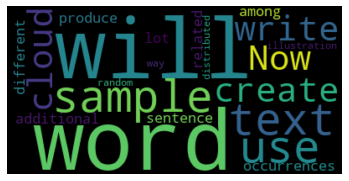

In [3]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

>* __wordcloud():__ It was imported from the WordCloud library. This function will generate a word cloud.
>* __.generate method:__ In .generation method contain one argument of the text data (which we want to create a word cloud). The syntax is .generate(text)
>* __imshow():__ imshow function will display the image.

#### Advance changes:

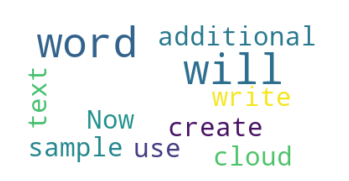

In [4]:
#change font_size, max_word and background_color
wordcloud = WordCloud(max_font_size=50, max_words=10, background_color="white").generate(text)
#Display the image
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

>* __max_font_size:__ This argument defines the maximum font size for the biggest word. If none, adjust as image height.
>* __max_words:__ It specifies the maximum number of the word, default is 200.
>* __background_color:__ It set up the background color of the word cloud image, by default the color is defined as black.
To display word cloud image `.imshow()` method of matplotlib.pyplot is used. In the above code, we are using two parameters:
>* __wordcloud:__ created in the above step
>* __interpolation=”bilinear”:__ used to display smoother image.

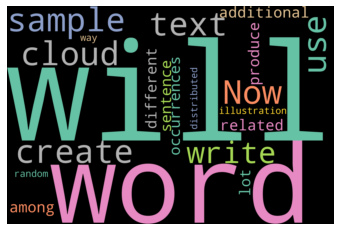

In [5]:
# Create stopword
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(text)
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### The description of the following arguments is below
>
>* __width/height:__ we can change the dimension of the canvas using these arguments. Here we assign width as 3000 and height as 2000.

>* __random_state:__  It will return PIL color for each word, set as an int value. 

>* __background_color:__ It is used for the background color of the word cloud image. If you want to add a    different color, you can explore this website.

>* __colormap:__ using this argument we can change each word color. Matplotlib colormaps provide awesome colors.

>* __collocation:__ collocation argument is set to FALSE to ensure that the word cloud doesn’t contain any   bigrams or duplicate words.

>* __stopwords:__ ‘stop_words’ are those words that are commonly used in the English language such as ‘we’,  ‘the’, ‘a’, ‘an’, etc. thus, we have to eliminate those words. we already imported the STOPWORDS function > from the WordCloud library.

---
### Using mask:
To create a custom shape, `WordCloud` function has a mask argument enabling it to take maskable images. 
We add the ‘cloud.png’ image using the NumPy array and store it as a mask variable. 
Here we are changing some more arguments to create an attractive word cloud. 
The arguments description as:

>* __mask:__ Specify the shape of the word cloud image. By default, it takes a rectangle. As we know we have created a variable as a mask assign it to the mask parameter.
>* __Contour_width:__ This parameter creates an outline of the word cloud mask. We set the width of the mask image is as 3.
>* __Contour_color:__ Contour_color use for the outline color of the mask image. It can be a string or color code. Here we use color code as ‘#023075’.

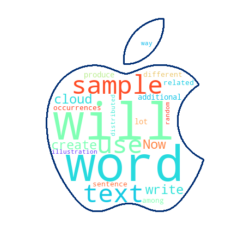

In [6]:
# Generate a word cloud image
stopwords = set(STOPWORDS)
mask = np.array(Image.open("apple logo png transparent Download png.png"))
wordcloud = WordCloud(stopwords=stopwords,background_color='white', max_words=1000, mask=mask,contour_color='#023075',contour_width=3,colormap='rainbow').generate(text)
# create image as cloud
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# store to file
plt.savefig("cloud.png", format="png")
plt.show()


see more here : [click here](https://www.kaggle.com/code/tarzon/custom-word-cloud)

### [▲](#Top)